<a href="https://colab.research.google.com/github/Ashliz1/NYC-Crime-Data---Group-10-/blob/main/term_project_starter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analysis of New York Crime

### Author: (Group 10) Ashley Gomez, Sung Ik Park
### Date : December 8th, 2025

## Executive Summary

This project analyzes crime patterns in New York using the spotcrime dataset. The goal is to identify which areas appear relatively safer than others based on crime type, location, and time of day. Using Python (ADD MORE HERE!), we will review the data, summarize, and visualize to reveal trends/patterns across New York. The findings provide a basic overview of where crime clusters occur, offering insight for residents, policymakers, and anyone evaluating safety within New York.

## Table of Contents

1. Introduction
2. Problem Statement / Research Question
3. Data Description
4. Setup and Environment
5. Data Loading
6. Data Preparation
7. Model Planning
8. Model Building / Analysis
9. Discussion & Interpretation
10. Conclusion
11. References
12. Appendix

## Introduction

The project analyzes crime data in New York by identifying trends and patterns in where incidents occur most often, exploring how crime is spread across the city. The analysis focuses on three main aspects of data: location, crime type, and time of day. We use the SpotCrime dataset, which includes values such as location, timestamp, crime type, longitude, and latitude. Our first steps involve cleaning the data, creating summaries, and using Python to organize the data. Overall, the goal is to understand which areas are safer than others by providing an overview of crime patterns across New York.

## Problem Statement / Research Question

This project aims to determine which areas in New York appear safer or less safe based on recorded crime counts in the dataset. Understanding the overall distribution of crime can help people decide where to live and support decision-makers seeking a clearer view of safety conditions. The analysis also considers which crime types are most frequent and whether certain times of day show higher activity. It is expected that some areas will have noticeably higher incident counts than others and that specific crime types may appear more frequently depending on location and time. The approach uses simple descriptive methods, including grouping and counting incidents and creating visualizations, to highlight where crime is most concentrated across New York.

## Data Description

The data set contains individual crime incident reports from various locations across New York. Each row represents a single reported crime type, date, time, and geographic information such as county, city, ZIP code, address, and latitude/longitude. The dataset is provided in CSV format and contains a larger number of rows and columns. Data such as the timestamp column will be converted to a proper datetime format, and specific datasets may include missing values or duplicates. Although the data set includes several variables, the key focus will be on location, time, and crime type; the level of detail helps capture enough information to identify patterns/trends in crime activity across New York.

## Setup and Environment

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

## Data Loading

In [ ]:
data_url = "https://raw.githubusercontent.com/Ashliz1/NYC-Crime-Data---Group-10-/refs/heads/main/spotcrime.crime.ny.csv"
df = pd.read_csv(data_url)
df.head()

In [ ]:
df.shape

(61824, 19)

In [20]:
df[['City','CrimeType','CrimeTime']].head()

,City,CrimeType,CrimeTime
0,Corona,Theft,2025-03-17 01:00:00+00:00
1,Corona,Theft,2025-03-16 23:00:00+00:00
2,Corona,Assault,2025-03-16 20:00:00+00:00
3,Corona,Theft,2025-03-16 20:00:00+00:00
4,Corona,Theft,2025-03-16 20:00:00+00:00


In [29]:
df[["City","CrimeType","CrimeTime","Latitude","Longitude"]].head()

,City,CrimeType,CrimeTime,Latitude,Longitude
0,Corona,Theft,2025-03-17 01:00:00+00:00,40.7468,-73.8605
1,Corona,Theft,2025-03-16 23:00:00+00:00,40.7468,-73.8605
2,Corona,Assault,2025-03-16 20:00:00+00:00,40.7468,-73.8605
3,Corona,Theft,2025-03-16 20:00:00+00:00,40.7468,-73.8605
4,Corona,Theft,2025-03-16 20:00:00+00:00,40.7468,-73.8605


## Data Preparation

In [30]:
# Convert CrimeTime to datetime format
df["CrimeTime"] = pd.to_datetime(df["CrimeTime"])
#Extract hour of the day from the timestamp
df["hour"] = df["CrimeTime"].dt.hour
# Drop rows where key fields are missing
df = df.dropna(subset = ["City","CrimeType","CrimeTime","Latitude","Longitude"])


## Model Planning

We will apply simple decriptive analysis and visualization to address our research questions. The

## Model building / Analysis

Location Analysis - Crime counts by City

In [22]:
# Count number of incidents by city
city_counts = df["City"].value_counts()
# show the top 10 cities
city_counts.head(10)

,count
City,
New York,6533
Brooklyn,2026
Buffalo,1761
Rochester,1759
Syracuse,1196
Bronx,1033
Albany,693
Staten Island,669
Jamaica,606


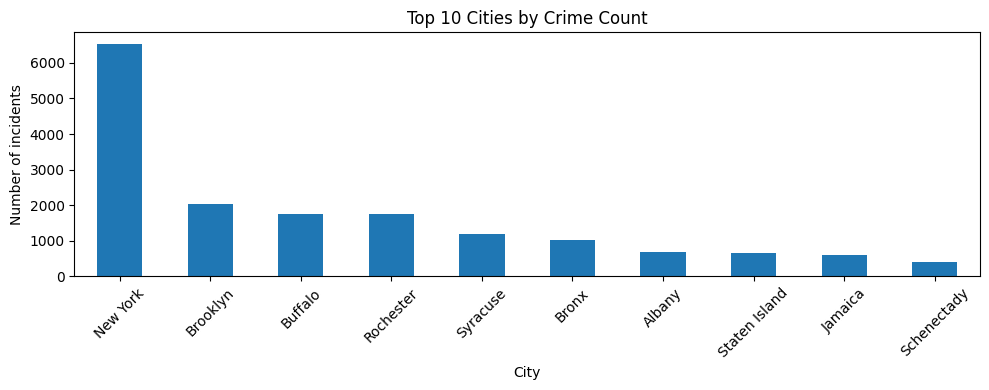

In [23]:
city_counts.head(10).plot(kind="bar", figsize = (10,4))
plt.title("Top 10 Cities by Crime Count")
plt.xlabel("City")
plt.ylabel("Number of incidents")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Crime Type Analysis

In [24]:
# Count number of incidents by crime type
crimetype_counts = df ["CrimeType"].value_counts()
# Show the top 10 crime types
crimetype_counts.head(10)


,count
CrimeType,
Theft,18496
Other,17670
Assault,10474
Arrest,7640
Burglary,2786
Vandalism,2032
Shooting,1496
Robbery,1139
Arson,91


### Functions

## Discussion and Results

## Conclusion

## References

## Appendix